<img align="right" src="../img/square_240.png" />
## Exercise: Square Test.

You are going to make a program for describing a square trajectory with the robot.

Instead of starting to code from scratch, you are going to reuse the code that you developed for the distance and turning exercises.


<img align="right" src="../img/reload.png" />
### 1. Starting position
For a better visual understanding of the task, it is recommended that the robot starts at the center of the room. 

You can easily relocate the robot there by simply restarting the simulation, by clicking on the second icon of the button bar, as depicted in the figure.

### 2. Initialization
After restarting the simulation, the robot needs to be initialized.

In [13]:
import packages.initialization
import pioneer3dx as p3dx
p3dx.init()

### 3. Program

The code is structured in three parts:
1. The first part is a function for moving forward: you must copy and paste the code of the [distance exercise](Distance.ipynb) inside the body of the function template, in the following cell.
2. The second part is a similar function for turning, where you can copy and paste the code of the [angle exercise](Angle.ipynb).
3. Finally, the third part is the main code, consisting of a loop that calls the previous functions four times. The code also displays the pose of the robot (position and orientation) before and after the motion.

In [14]:
import math

# Robot data
wheel_diameter = 0.1953          # in meters
wheel_radius = wheel_diameter/2  # in meters
axis_length = 0.330              # in meters

# Targets
target_distance = 2              # in meters
target_angle = math.pi/2         # in radians

def forward():
    distance = 0
    initial_encoder = p3dx.leftEncoder
    # Move the robot forward for a given target distance
    while distance < target_distance:
        p3dx.move(1.2, 1.2)
        # Rotated angle for the left wheel since the beginning of the movement.
        # The same rotated angle for the right wheel.
        wheel_rotated_angle = p3dx.leftEncoder - initial_encoder
        # Distance traveled by the robot.
        distance = wheel_rotated_angle * wheel_radius
    p3dx.stop()

In [15]:
def turn():
    rotated_angle = 0
    initial_encoder = p3dx.leftEncoder
    # Turn the robot right for a given target angle
    while rotated_angle < target_angle:
        p3dx.move(0.5, -0.5)
        # Rotated angle for the left wheel since the beginning of the movement.
        # The same rotated angle for the right wheel, but with opposite sign.
        wheel_rotated_angle = p3dx.leftEncoder - initial_encoder
        # Angle rotated by the robot to the right
        rotated_angle = (wheel_rotated_angle * wheel_radius * 2)/axis_length
    p3dx.stop()

In [16]:
print('Pose of the robot at the start')
p3dx.pose()
for _ in range(4):
    forward()
    turn()    
print('Pose of the robot at the end')
p3dx.pose()

Pose of the robot at the start
x:   0.00
y:   0.00
th: -1.57
Pose of the robot at the end
x:  -0.06
y:   0.02
th: -1.53


The trajectory can also be displayed:

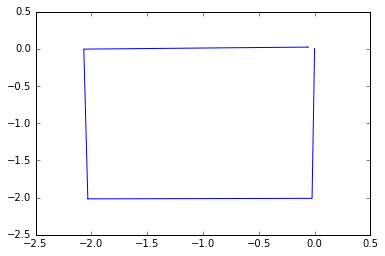

In [17]:
%matplotlib inline                
import matplotlib.pyplot as plt   # WARNING: the first time, this import can take up to 30 seconds
x, y = p3dx.trajectory()          # because of font cache building, please be patient and wait
plt.plot(x,y);

Next exercise: [Robot Speed](Robot%20Speed.ipynb)

---
#### Try-a-Bot: an open source guide for robot programming
Developed by:
[![Robotic Intelligence Lab @ UJI](img/logo/robinlab.png "Robotic Intelligence Lab @ UJI")](http://robinlab.uji.es)

Sponsored by:
<table>
<tr>
<td style="border:1px solid #ffffff ;">
<a href="http://www.ieee-ras.org"><img src="img/logo/ras.png"></a>
</td>
<td style="border:1px solid #ffffff ;">
<a href="http://www.cyberbotics.com"><img src="img/logo/cyberbotics.png"></a>
</td>
<td style="border:1px solid #ffffff ;">
<a href="http://www.theconstructsim.com"><img src="img/logo/theconstruct.png"></a>
</td>
</tr>
</table>

Follow us:
<table>
<tr>
<td style="border:1px solid #ffffff ;">
<a href="https://www.facebook.com/RobotProgrammingNetwork"><img src="img/logo/facebook.png"></a>
</td>
<td style="border:1px solid #ffffff ;">
<a href="https://www.youtube.com/user/robotprogrammingnet"><img src="img/logo/youtube.png"></a>
</td>
</tr>
</table>
